In [47]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [48]:
readIn = pd.read_csv("training_data.csv")
df = pd.DataFrame(readIn)

In [49]:
readIn = pd.read_csv("data_submission_example.csv")
df_target = pd.DataFrame(readIn)
df_target.head(20)

,BORROWER_ID,PRED
0,+++b/oYx,0.014477
1,+++pcjqH,0.014477
2,+++ukYrT,0.014477
3,+++wvYn7,0.014477
4,++/6JzSJ,0.014477
5,++/Ys2ls,0.014477
6,++/faYdJ,0.014477
7,++/rT+Iv,0.014477
8,++0Mv31Z,0.014477
9,++0yhZwt,0.014477


In [50]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [51]:
data_count=len(df)

In [52]:
data_count

1602753

In [53]:
coloumns=[
    'CONTRACT_ID',
    'BORROWER_ID',
    'CONTRACT_BANK_ID',
    'CONTRACT_CREDIT_INTERMEDIARY',
    'CONTRACT_CREDIT_LOSS',
    'CONTRACT_CURRENCY',
    'CONTRACT_DATE_OF_LOAN_AGREEMENT',
    'CONTRACT_DEPT_SERVICE_TO_INCOME',
    'CONTRACT_FREQUENCY_TYPE',
    'CONTRACT_INCOME',
    'CONTRACT_INSTALMENT_AMOUNT',
    'CONTRACT_INSTALMENT_AMOUNT_2',
    'CONTRACT_INTEREST_PERIOD',
    'CONTRACT_INTEREST_RATE',
    'CONTRACT_LGD',
    'CONTRACT_LOAN_AMOUNT',
    'CONTRACT_LOAN_CONTRACT_TYPE',
    'CONTRACT_LOAN_TO_VALUE_RATIO',
    'CONTRACT_LOAN_TYPE',
    'CONTRACT_MARKET_VALUE',
    'CONTRACT_MATURITY_DATE',
    'CONTRACT_MORTGAGE_LENDING_VALUE',
    'CONTRACT_MORTGAGE_TYPE',
    'CONTRACT_REFINANCED',
    'CONTRACT_RISK_WEIGHTED_ASSETS',
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
    'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT',
    'TARGET_EVENT',
    'TARGET_EVENT_DAY'
]

# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MATURITY_DATE',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'TARGET_EVENT'
# ]

In [54]:
df=df[coloumns]

# Data preparation

## Coloumns

### ISNA

In [55]:
df.isna().sum()

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### CONTRACT_ID

### BORROWER_ID

In [56]:
df['BORROWER_ID'].value_counts()

xNullx      1090
akvNVipI      24
qW3B+pgb      22
95IQewTL      19
JARtY3P1      18
            ... 
LqRn3EsW       1
odaCvCmO       1
seFkKZ2U       1
WJWtceMu       1
Dxng1cGs       1
Name: BORROWER_ID, Length: 1149851, dtype: int64

In [57]:
cols= [
    'BORROWER_ID',
    'CONTRACT_INCOME',
    'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT',
]

df_borrower=df[cols]

df_borrower=df_borrower.drop_duplicates()

print(df_borrower.duplicated().value_counts())

print(len(df_borrower['BORROWER_ID'].unique()))

df_b2=df_borrower.duplicated()

print(df_borrower.isna().sum())

False    1595246
dtype: int64
1149851
BORROWER_ID                         0
CONTRACT_INCOME                192145
BORROWER_BIRTH_YEAR             40757
BORROWER_CITIZENSHIP            40757
BORROWER_COUNTRY                40757
BORROWER_COUNTY                 94503
BORROWER_TYPE_OF_CUSTOMER           0
BORROWER_TYPE_OF_SETTLEMENT    522319
dtype: int64


In [58]:
cols= [
    'BORROWER_ID',
    'CONTRACT_INCOME',
    #'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT'
]

df_borrower['BORROWER_BIRTH_YEAR'] = df.groupby('BORROWER_ID')['BORROWER_BIRTH_YEAR'].transform(lambda x: x.fillna(x.mean()))

df_borrower = df_borrower.sort_values(by='BORROWER_ID', ascending=True)

print(df_borrower.duplicated().value_counts())

df_borrower

False    1595246
dtype: int64


,BORROWER_ID,CONTRACT_INCOME,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT
192167,+++b/oYx,405165.0,1257.0,98.0,98.0,87.0,B,0.0
1373556,+++pcjqH,0.0,1260.0,98.0,98.0,112.0,B,3.0
984427,+++ukYrT,94702.0,1222.0,98.0,98.0,133.0,A,NaN
30615,+++wvYn7,NaN,1260.0,98.0,98.0,189.0,A,NaN
917438,++/6JzSJ,221782.0,1254.0,98.0,98.0,124.0,A,3.0
...,...,...,...,...,...,...,...,...
1462859,zzzUlMwd,98725.0,1226.0,98.0,98.0,184.0,A,4.0
521425,zzzf5tKU,373798.0,1233.0,98.0,98.0,15.0,A,4.0
314590,zzzjSsQj,116514.0,1241.0,98.0,98.0,53.0,A,4.0
932445,zzzwyh7V,379497.0,1257.0,98.0,98.0,30.0,A,3.0


In [59]:
df_borrower.isna().sum()

BORROWER_ID                         0
CONTRACT_INCOME                192145
BORROWER_BIRTH_YEAR             13528
BORROWER_CITIZENSHIP            40757
BORROWER_COUNTRY                40757
BORROWER_COUNTY                 94503
BORROWER_TYPE_OF_CUSTOMER           0
BORROWER_TYPE_OF_SETTLEMENT    522319
dtype: int64

In [62]:
df_borrower['BBORROWER_CITIZENSHIP'] = df.groupby('BORROWER_ID')['BORROWER_CITIZENSHIP'].transform(lambda x: x.fillna(x))

In [63]:
df_borrower.isna().sum()

BORROWER_ID                         0
CONTRACT_INCOME                192145
BORROWER_BIRTH_YEAR             13528
BORROWER_CITIZENSHIP            40757
BORROWER_COUNTRY                40757
BORROWER_COUNTY                 94503
BORROWER_TYPE_OF_CUSTOMER           0
BORROWER_TYPE_OF_SETTLEMENT    522319
BBORROWER_CITIZENSHIP           40757
dtype: int64

### BORROWER_BIRTH_YEAR

### BORROWER_CITIZENSHIP

### BORROWER_COUNTRY

In [ ]:
df['BORROWER_COUNTRY'].value_counts()

BORROWER_COUNTRY
98.0     1559221
187.0        188
199.0        143
225.0         49
108.0         35
162.0         32
406.0         31
188.0         28
228.0         27
55.0          14
175.0         14
194.0          8
180.0          8
75.0           5
220.0          5
100.0          5
73.0           4
143.0          4
36.0           4
41.0           4
197.0          4
111.0          4
3.0            3
131.0          3
103.0          2
207.0          2
174.0          2
173.0          2
190.0          2
236.0          2
150.0          2
153.0          2
57.0           2
53.0           2
218.0          2
13.0           2
120.0          2
163.0          2
241.0          1
229.0          1
112.0          1
106.0          1
132.0          1
105.0          1
169.0          1
11.0           1
54.0           1
133.0          1
192.0          1
135.0          1
160.0          1
170.0          1
195.0          1
Name: count, dtype: int64

### BORROWER_COUNTY

In [ ]:
df['BORROWER_COUNTY'].value_counts()

BORROWER_COUNTY
120.0    39679
189.0    34549
171.0    32164
2.0      26953
6.0      26858
         ...  
63.0      1867
110.0     1757
36.0      1737
61.0      1693
162.0     1618
Name: count, Length: 199, dtype: int64

### BORROWER_TYPE_OF_CUSTOMER

### BORROWER_TYPE_OF_SETTLEMENT

### CONTRACT_BANK_ID

In [ ]:
df['CONTRACT_BANK_ID'].value_counts()

CONTRACT_BANK_ID
1d42bbf5    553874
caa130b5    229117
bd940aa2    133187
f789f8b0    131126
2c6f5579     99995
             ...  
10b110f3         5
d4cdedfe         5
85764f78         4
95e75ed5         2
e9e18710         2
Name: count, Length: 136, dtype: int64

### CONTRACT_CREDIT_INTERMEDIARY

### CONTRACT_CREDIT_LOSS

### CONTRACT_CURRENCY

In [ ]:
df['CONTRACT_CURRENCY'].value_counts()

CONTRACT_CURRENCY
31    1602691
24         37
14         25
Name: count, dtype: int64

### CONTRACT_DATE_OF_LOAN_AGREEMENT

### CONTRACT_DEPT_SERVICE_TO_INCOME

In [ ]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].value_counts()

CONTRACT_DEPT_SERVICE_TO_INCOME
0.00      37284
49.46       646
49.43       629
49.47       625
49.41       613
          ...  
82.06         1
66.51         1
171.89        1
93.07         1
112.13        1
Name: count, Length: 11367, dtype: int64

### CONTRACT_FREQUENCY_TYPE

In [ ]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1477500
2f88e16c      58702
87db11f5      47152
3265c5b7      17386
ad534644       1616
89efd382        337
2aebe4cb         53
bd092d5a          7
Name: count, dtype: int64

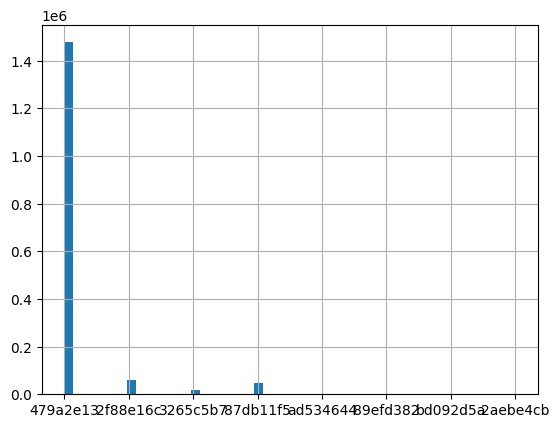

In [ ]:
df['CONTRACT_FREQUENCY_TYPE'].hist(bins=50)
plt.show()

### CONTRACT_INCOME

In [ ]:
df['CONTRACT_INCOME'].value_counts()

CONTRACT_INCOME
0.0         39179
1.0           518
2.0            51
85821.0        21
85214.0        21
            ...  
595553.0        1
493575.0        1
273729.0        1
316621.0        1
414567.0        1
Name: count, Length: 410880, dtype: int64

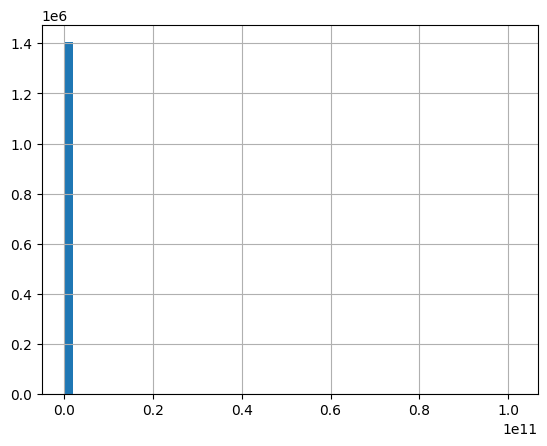

In [ ]:
df['CONTRACT_INCOME'].hist(bins=50)
plt.show()

In [ ]:
cols=['CONTRACT_DEPT_SERVICE_TO_INCOME','CONTRACT_INCOME', 'CONTRACT_LOAN_AMOUNT' ]

df[cols].head(20)

,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_LOAN_AMOUNT
0,NaN,NaN,192161
1,NaN,NaN,55590
2,7.05,127305.0,275924
3,NaN,NaN,138862
4,NaN,NaN,169624
5,NaN,NaN,100079
6,33.94,172647.0,338415
7,NaN,NaN,140975
8,NaN,NaN,60963
9,NaN,NaN,190782


### CONTRACT_INSTALMENT_AMOUNT and _2

In [ ]:
df['CONTRACT_INSTALMENT_AMOUNT'].value_counts()

CONTRACT_INSTALMENT_AMOUNT
0.0          25856
9917.0          33
8708.0          32
9912.0          31
9940.0          31
             ...  
69197.0          1
45869.0          1
1767859.0        1
56375.0          1
418.0            1
Name: count, Length: 61334, dtype: int64

In [ ]:
df['CONTRACT_INSTALMENT_AMOUNT_2'].value_counts()

CONTRACT_INSTALMENT_AMOUNT_2
0.0          50214
9926.0         113
9934.0         113
9985.0         109
9902.0         107
             ...  
181434.0         1
79471.0          1
267987.0         1
1435741.0        1
146483.0         1
Name: count, Length: 158047, dtype: int64

### CONTRACT_INTEREST_PERIOD

### CONTRACT_INTEREST_RATE

In [ ]:
df['CONTRACT_INTEREST_RATE'].value_counts()

CONTRACT_INTEREST_RATE
0.00     110269
6.13       3223
6.08       3176
6.11       3102
6.10       3088
          ...  
39.32         1
42.01         1
94.86         1
63.31         1
37.97         1
Name: count, Length: 4322, dtype: int64

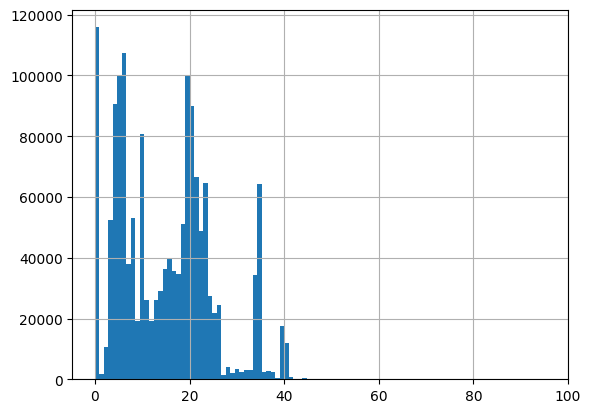

In [ ]:
df['CONTRACT_INTEREST_RATE'].hist(bins=100)
plt.show()

### CONTRACT_LGD

### CONTRACT_LOAN_AMOUNT

### CONTRACT_LOAN_CONTRACT_TYPE

### CONTRACT_LOAN_TO_VALUE_RATIO

### CONTRACT_LOAN_TYPE

In [ ]:
df['CONTRACT_LOAN_TYPE'].value_counts()

CONTRACT_LOAN_TYPE
b503a0de    1008064
1f951336     157973
d3aaffde      90930
7e2065f4      88126
69f70539      68104
2f88e16c      58702
955ae3ef      57006
cf07c2dd      36335
5a06241e      21028
83910425       6920
694cbaee       3497
0aeb4094       2764
eab72d7a       2310
95c4f8fb        571
f792971b        240
cde77491        106
47693941         74
8fe006f1          3
Name: count, dtype: int64

### CONTRACT_MARKET_VALUE

In [ ]:
df['CONTRACT_MARKET_VALUE'].value_counts()

CONTRACT_MARKET_VALUE
0.0           32583
1.0              67
4.0              54
2.0              21
6914608.0        15
              ...  
3057979.0         1
5045813.0         1
22187871.0        1
19447135.0        1
532230.0          1
Name: count, Length: 274389, dtype: int64

### CONTRACT_MATURITY_DATE

### CONTRACT_MORTGAGE_LENDING_VALUE

### CONTRACT_MORTGAGE_TYPE

### CONTRACT_REFINANCED

### CONTRACT_RISK_WEIGHTED_ASSETS

### CONTRACT_TYPE_OF_INTEREST_REPAYMENT

### TARGET_EVENT_DAY

### TARGET_EVENT

### Check ISNA

In [ ]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [ ]:
duplikalt_sorok = df[df.duplicated(subset=['CONTRACT_ID','BORROWER_ID','CONTRACT_BANK_ID'])]

In [ ]:
len(duplikalt_sorok)

0

In [ ]:
col=['CONTRACT_CREDIT_LOSS', 'TARGET_EVENT']
df2=df[col]
df2.head(100)

,CONTRACT_CREDIT_LOSS,TARGET_EVENT
0,0.0,-
1,0.0,-
2,16350.0,-
3,0.0,-
4,2395.0,-
...,...,...
95,0.0,-
96,25821.0,-
97,0.0,-
98,0.0,-


First, i should prepare the borrower data, and maybe with that, i could predict certain elements  of the contract data.

In [ ]:
nan_count=  df.isna().sum()

In [ ]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1477500
2f88e16c      58702
87db11f5      47152
3265c5b7      17386
ad534644       1616
89efd382        337
2aebe4cb         53
bd092d5a          7
Name: count, dtype: int64

In [ ]:
coloumns = nan_count[nan_count/data_count<=0.5].index
off_coloumns = nan_count[nan_count/data_count>0.5].index

print(len(coloumns))
print(len(off_coloumns))

28
6


In [ ]:
df_2=df[coloumns]

In [ ]:
off_coloumns

Index(['CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_LOAN_TO_VALUE_RATIO',
       'CONTRACT_MARKET_VALUE', 'CONTRACT_MORTGAGE_LENDING_VALUE',
       'CONTRACT_MORTGAGE_TYPE', 'TARGET_EVENT_DAY'],
      dtype='object')

#### CONTRACT_CREDIT_LOSS

In [ ]:
df['CONTRACT_CREDIT_LOSS'].isna().sum()

36154

In [ ]:
df['CONTRACT_CREDIT_LOSS']=df['CONTRACT_CREDIT_LOSS'].fillna(0)

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

In [ ]:
df.nunique()

CONTRACT_ID                            1274533
BORROWER_ID                            1149851
CONTRACT_BANK_ID                           136
CONTRACT_CREDIT_INTERMEDIARY                 4
CONTRACT_CREDIT_LOSS                    165007
CONTRACT_CURRENCY                            3
CONTRACT_DATE_OF_LOAN_AGREEMENT           1072
CONTRACT_DEPT_SERVICE_TO_INCOME          11367
CONTRACT_FREQUENCY_TYPE                      8
CONTRACT_INCOME                         410880
CONTRACT_INSTALMENT_AMOUNT               61334
CONTRACT_INSTALMENT_AMOUNT_2            158047
CONTRACT_INTEREST_PERIOD                  1038
CONTRACT_INTEREST_RATE                    4322
CONTRACT_LGD                            879303
CONTRACT_LOAN_AMOUNT                    835480
CONTRACT_LOAN_CONTRACT_TYPE                  8
CONTRACT_LOAN_TO_VALUE_RATIO             11662
CONTRACT_LOAN_TYPE                          18
CONTRACT_MARKET_VALUE                   274389
CONTRACT_MATURITY_DATE                   10744
CONTRACT_MORT